# Case dos Macaquinhos Quant.dev

<p align='center'>
    <img src='https://www.icr.org/i/articles/af/monkey_biz_chimp_wide.jpg'>
</p>

Neste notebook você praticará técnicas que serão necessárias para desenvolver uma estratégia quantitativa de investimentos. São elas:

1. Obter dados financeiros
2. Visualização de dados financeiros
3. Cálculo de Risco e Retorno
4. Estatística
6. Portfólio de investimento

5. Processos estocásticos
7. Gestão de Risco

8. Algotrading
9. Análise e previsão de Séries Temporais
10. Machine Learning

## Materiais de apoio:
1. [Coursera: Introduction to Portfolio Construction and Analysis with Python ](https://www.coursera.org/programs/universidade-de-sao-paulo-br-on-coursera-mvxtw?currentTab=MY_COURSES&productId=qeyXSV_uEeiNIQqyU-T6bA&productType=course&showMiniModal=true) 

    - Semanas 1 e 2 

2. [Playlist de Finanças Quantitativas do FEA.dev ](https://www.youtube.com/playlist?list=PLiJqHBsOKi2cabSus1hgdSNAHeU0md6_D)

3. [Extração de dados do Banco Central de forma simplificada ](https://medium.com/fea-dev/extra%C3%A7%C3%A3o-de-dados-do-banco-central-de-forma-simplificada-7b946069c03e)


4. Livros: 
    
    * _Python for Finance: Analyze Big Financial Data (segunda edição)_ (especialmente o capítulo 12)


5. Cursos do DataCamp: 
   
    - [Introduction to Portfolio Risk Management in Python ](https://learn.datacamp.com/courses/introduction-to-portfolio-risk-management-in-python)
    - [Quantitative Risk Management in Python ](https://learn.datacamp.com/courses/quantitative-risk-management-in-python)
    - [Machine Learning for Finance in Python ](https://learn.datacamp.com/courses/machine-learning-for-finance-in-python)
    - [Machine Learning for Time Series Data in Python](https://learn.datacamp.com/courses/machine-learning-for-time-series-data-in-python)


6. Extras (**Não são necessários**, apenas para motivá-los)
    - [What is Quant Finance ](https://www.youtube.com/watch?v=l7imVaK0MIQ)
    - [What is a Quant Trader? | Systematic Investing | What is a Quant Hedge Fund? | Trading Ideas](https://www.youtube.com/watch?v=EBZVtDZw9ug)
    - [The Story of James Simons - Renaissance Technologies & Medallion Fund ](https://www.youtube.com/watch?v=xkbdZb0UPac&pp=ugMICgJwdBABGAE%3D)
    - [Quants Os Alquimistas de Wall Street ](https://www.youtube.com/watch?v=ed2FWNWwE3I)
    - [Nossa planilha de recomendações (blogs, sites, canais do youtube) ](https://docs.google.com/spreadsheets/d/12YnAl8Tmd5fTDUL__3dEKsnQ1G28yKNaOLRt3Hq3aZs/edit#gid=0)
    - [What is Quantitative Finance? ](https://medium.com/swlh/what-is-quantitative-finance-193ee8788ed4#:~:text=It%20is%20a%20field%20of,trading%2C%20and%20predicting%20market%20moves)
    
    - Blog da Giant Steps
        - [O que são fundos quantitativos?](https://gscap.com.br/o-que-e-um-fundo-quantitativo/)
        - [Evolução do Mercado de Gestão Quantitativa no Brasil](https://gscap.com.br/evolucao-do-mercado-de-gestao-quantitativa-brasileiro/)
        - [Como combinar ativos de risco e criar um portfólio conservador](https://gscap.com.br/como-combinar-2-ativos-de-risco-e-deixar-uma-carteira-de-investimentos-mais-conservadora/)
        - [O que é um algoritmo de investimento?](https://gscap.com.br/o-que-e-um-algoritmo-de-investimento/)
        - [Tipos de algoritmos – Parte I: Algoritmos de Estratégia](https://gscap.com.br/tipos-de-algoritmos-parte-1-algoritmos-de-estrategia/)
        - [Tipos de Algoritmo – Parte II : A Orquestra](https://gscap.com.br/tipos-de-algoritmo-parte-ii-a-orquestra/)




----

## 0-) Bibliotecas Básicas

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import mplfinance as mpf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


## 1-) Obter dados financeiros

Para acessar dados históricos de ativos, podemos utilizar diferentes APIs¹ com suporte ao python. Geralmente, elas nos retornam datasets no formato OHLCV (open-high-low-close-volume). Se atente para a exstência de colunas como 'split' ou 'adjustment close', pois será por meio dessas informações que realizamos backtest, já que uma ação pode ter historicamente distribuído dividendos ou sofrido inplits/splits.

São alguns meios que você pode utilizar ²:
- Yahoo Finance
- Alpha vantge
- Investpy (do site investing.com)
- Quandl
- Pandas Data Reader: é uma biblioteca que permite a criação de Dataframes utilizando diferentes fontes de dados da internet, saiba que ela possui integração com algumas APIs de dados financeiros.

Pesquise sobre o funcionamento delas , como instalar (se atente aos requerimentos, caso haja conflito com seu ambiente padrão, crie um outro documento para extrair os dados), e se essas fontes estão ativas no momento ³

Observações:

1: API significa Application Programming Interface (Interface de Programação de Aplicação), são canais de trocas de informações entre sistemas. Nesse caso, são fornecidos dados financeiros de um sistema (servidor) para o seu computador

2: Ações listadas na B3 geralmente são identificadas por essas APIs pelo sufixo ".SAO" ou ".SA". Exemplo "PETR4.SAO"

3: Essa parte pode dar muita dor de cabeça, principalmente na forma como você organiza e agrupa os dados



<img src="https://i.makeagif.com/media/3-24-2016/JrSj8G.gif"></img>

### a-) Obtenha os dados diários das ações da Vale (VALE3) entre "01/01/2018" e "31/08/2021"


In [3]:
vale = yf.download('VALE3.SA', start='2018-01-01',end='2021-08-31')

[*********************100%***********************]  1 of 1 completed


### b-) Obtenha dados diários de um conjunto de 10 ações (Vale, Petrobras, Klabin, Magazine Luiza, Minerva, Itaú, Bradesco, B3, Via Varejo, Ambev) entre "01/01/2018" e "31/08/2021", agrupe-as da forma que preferir

obs: pode ser que ocorra um erro devido a quantidade de "chamadas que você faz", tente resolver

In [4]:
tickers = ['VALE3.SA','PETR4.SA','KLBN4.SA','MGLU3.SA','BEEF3.SA','ITUB4.SA','BBDC4.SA','B3SA3.SA','BHIA3.SA','ABEV3.SA']
data = yf.download(tickers, start='2018-01-01',end='2021-08-31')

df = pd.DataFrame(data)

[*********************100%***********************]  10 of 10 completed


In [5]:
df

Adj Close                                                         \
             ABEV3.SA   B3SA3.SA   BBDC4.SA  BEEF3.SA    BHIA3.SA   ITUB4.SA   
Date                                                                           
2018-01-02  17.242147   6.159893  14.797679  8.478381  168.392563  21.716022   
2018-01-03  17.281893   6.264756  14.865706  8.416097  169.266190  21.864492   
2018-01-04  17.186502   6.305087  15.109619  8.384954  170.576645  22.319796   
2018-01-05  17.250097   6.396504  15.195197  8.478381  165.116440  22.384134   
2018-01-08  17.218302   6.426079  15.190917  8.190319  167.955750  22.309902   
...               ...        ...        ...       ...         ...        ...   
2021-08-24  15.283107  12.622236  18.465429  7.405787  247.166122  26.840496   
2021-08-25  15.274418  12.703963  18.497023  7.449506  246.509933  26.875191   
2021-08-26  14.866058  12.404299  18.141607  7.239660  238.198151  26.224771   
2021-08-27  14.805239  12.658559  18.378548  7.300866  237.760681  26.675726   
2021-08-30  14.926878  12.440622  18.181103  7.379556  235.354645  26.484940   

                                                       ...    Volume  \
            KLBN4.SA   MGLU3.SA   PETR4.SA   VALE3.SA  ...  ABEV3.SA   
Date                                                   ...             
2018-01-02  2.152729   2.014920   5.621988  26.179436  ...  12717900   
2018-01-03  2.132979   1.989511   5.672942  26.022564  ...   9389900   
2018-01-04  2.159312   2.037280   5.683133  26.129236  ...   9150100   
2018-01-05  2.119813   1.997133   5.717102  26.537113  ...  11510200   
2018-01-08  2.126395   1.997388   5.785042  27.126965  ...   7074000   
...              ...        ...        ...        ...  ...       ...   
2021-08-24  3.662101  17.995621  11.060006  74.195061  ...  18073900   
2021-08-25  3.804976  18.285570  11.120158  74.038803  ...  13858600   
2021-08-26  3.759858  17.584078  11.023914  73.093773  ...  22172500   
2021-08-27  3.782417  17.799204  11.424928  74.924286  ...  16973500   
2021-08-30  3.782417  17.658903  11.348738  74.448051  ...  16781900   

                                                                               \
            B3SA3.SA  BBDC4.SA BEEF3.SA BHIA3.SA  ITUB4.SA KLBN4.SA  MGLU3.SA   
Date                                                                            
2018-01-02  29013300  14794320   322792      868  16650900   166870  63536530   
2018-01-03  18920100   9683264   373133      443  22295700   139150  44247372   
2018-01-04  16965300  16803885   668568      489  23222550   220000  51250725   
2018-01-05  21964800  11602172   414524      457  15717450   109450  32806622   
2018-01-08  20775600  11357609  1042718      155  12708150   148500  30788069   
...              ...       ...      ...      ...       ...      ...       ...   
2021-08-24  33260300  40907240  4735700  1194032  30154700  1426150  75246491   
2021-08-25  20126000  20103600  4055400   877840  17524300  1563980  32877935   
2021-08-26  28614800  33102630  6961200  1293140  35118800   839850  37335751   
2021-08-27  23793100  22746900  6073700   871778  22271200   616330  24434758   
2021-08-30  22561400  22814990  5450400  1179791  18801900   631510  23979408   

                                
            PETR4.SA  VALE3.SA  
Date                            
2018-01-02  33461800  14156500  
2018-01-03  55940900  12744200  
2018-01-04  37064900  18433000  
2018-01-05  26958200  15251300  
2018-01-08  28400000  14542800  
...              ...       ...  
2021-08-24  49831400  29779200  
2021-08-25  46031200  15088600  
2021-08-26  41061300  18032300  
2021-08-27  76465300  19572800  
2021-08-30  61054000  13031600  

[906 rows x 60 columns]

In [6]:
k = [i[0] for i in list(df)]

lista = []
for i in k:
    if i not in lista:
        lista.append(i)

print(lista)

['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


----

## 2-) Visualização de dados financeiros

<img src='https://i.kym-cdn.com/photos/images/original/002/073/269/599'>


### a-) Faça um gráfico contendo o preço de fechamento das ações da Vale, sua média móvel dos últimos 20 dias, plote as bandas de Bollinger (dois desvios para cima e dois desvios para baixo)

obs: caso não saiba sobre as "Bandas de Bollinger" , acesse o link https://www.investopedia.com/terms/b/bollingerbands.asp 

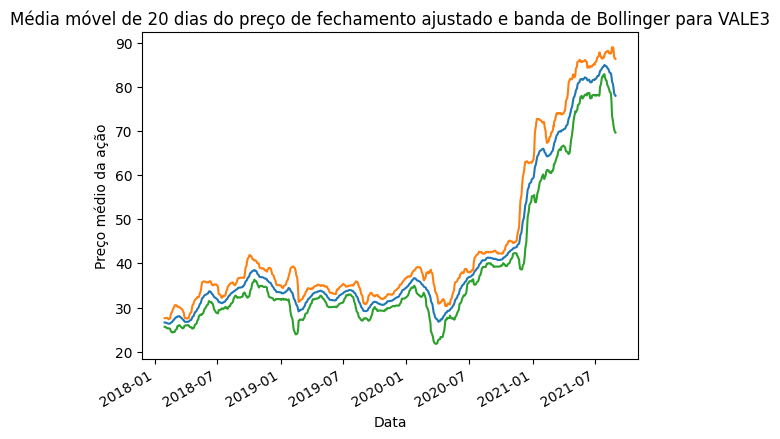

In [7]:
df['Adj Close']['VALE3.SA'].rolling(window=20).mean().plot(label="Média móvel de 20 dias do preço de fechamento ajustado (R$)")
(df['Adj Close']['VALE3.SA'].rolling(window=20).mean() +2*df['Adj Close']['VALE3.SA'].rolling(window=20).std()).plot(label="+2 DP")
(df['Adj Close']['VALE3.SA'].rolling(window=20).mean() -2*df['Adj Close']['VALE3.SA'].rolling(window=20).std()).plot(label="-2 DP")

plt.rcParams['figure.figsize'] = (15, 5)
plt.xlabel("Data")
plt.ylabel("Preço médio da ação")
plt.title("Média móvel de 20 dias do preço de fechamento ajustado e banda de Bollinger para VALE3")
plt.show()

### b-) Faça um gráfico contendo o preço de fechamento (ajustado) três ativos extraídos por você anteriormente

obs: é possível plotá-los em um mesmo eixo ou criar subplots

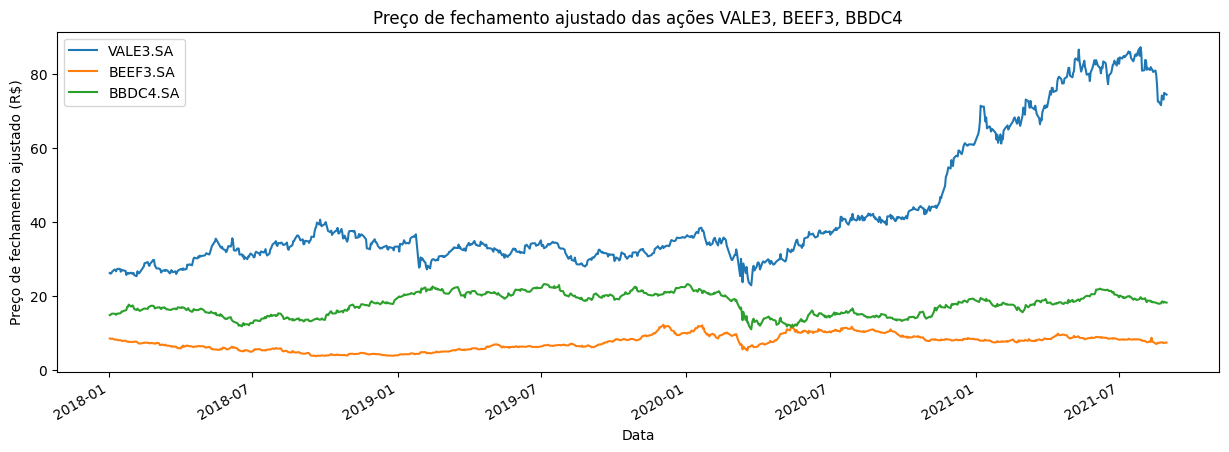

In [8]:
df['Adj Close'].plot(y=['VALE3.SA','BEEF3.SA','BBDC4.SA'])
plt.xlabel("Data")
plt.ylabel("Preço de fechamento ajustado (R$)")
plt.title("Preço de fechamento ajustado das ações VALE3, BEEF3, BBDC4")
plt.show()

### c-) Faça um gráfico contendo o preço de fechamento das ações da Vale e seu volume (repare que o nível de grandeza entre as unidades é diferente, procure um jeito que não altere as proporções do gráfico)

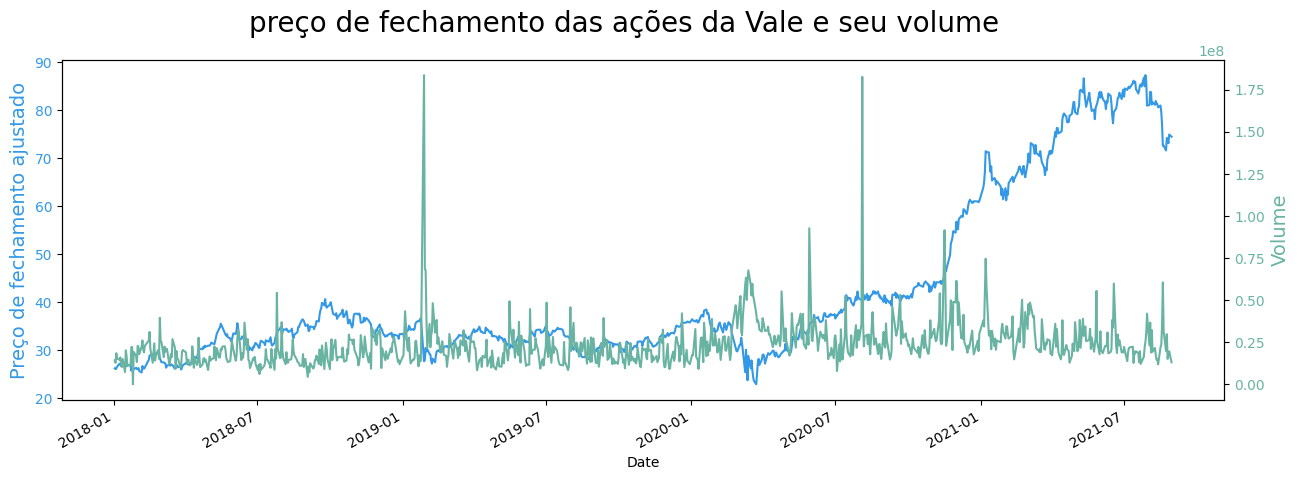

In [9]:
adj_color = "#3399e6"
volume_color = "#69b3a2"

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df.index, df['Adj Close']['VALE3.SA'], color=adj_color)
ax2.plot(df.index, df['Volume']['VALE3.SA'], color=volume_color)

ax1.set_xlabel("Date")
ax1.set_ylabel("Preço de fechamento ajustado", color=adj_color, fontsize=14)
ax1.tick_params(axis="y", labelcolor=adj_color)

ax2.set_ylabel("Volume", color=volume_color, fontsize=14)
ax2.tick_params(axis="y", labelcolor=volume_color)

fig.suptitle("preço de fechamento das ações da Vale e seu volume", fontsize=20)
fig.autofmt_xdate()

### d-) Faça um gráfico candle stick das ações da Vale

### e-) Faça um gráfico de dispersão entre dois ativos

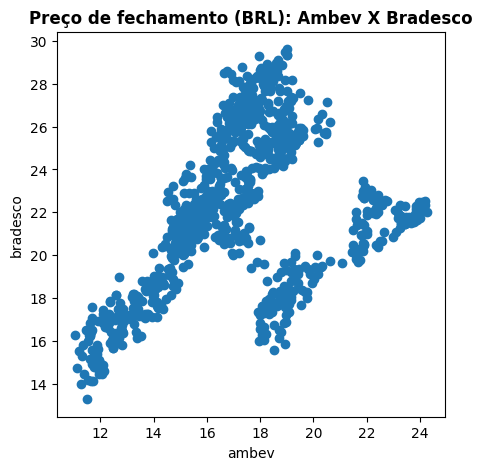

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches([5, 5])

ax.scatter(df['Close']['ABEV3.SA'], df['Close']['BBDC4.SA'])

ax.set_xlabel('ambev')
ax.set_ylabel('bradesco')
ax.set_title(f'Preço de fechamento (BRL): Ambev X Bradesco', fontweight = 'bold')

plt.show()

----


## 3-) Cálculo de Métricas de risco e retorno
<img src='https://thumbs.gfycat.com/HiddenHopefulDuckbillplatypus-size_restricted.gif'>



## __Retornos Discretos__

Há diferentes maneiras que o retorno pode ser representado.

__a-) Retornos Brutos (_Gross Returns_)__

$R_{t+1}= \frac{P_{t+1}}{P_t}$

* ${P_t}$ : preço do ativo no início do período
* $P_{t+1}$ : preço do ativo no final do período
* $t$: período inicial

obs1: a notação do período pode mudar, em alguns materiais a fórmula o representa por  $\frac{P_{t}}{P_t-1}$ . O princípio é o mesmo, posterior no numerador e anterior no denominador

obs2:  Caso seja um ativo que pague dividendo, a fórmula será a seguinte:

$R_{t+1}= \frac{P_{t+1} + D_{t+1}}{P_t}$

obs3:  Essa fórmula assume que o preço do ativo pode ser medido, o que nem sempre é verdade, dado o caso de ativos ilíquidos (isso não será importante para o case e talvez não muito importante para o andar de seus estudos, apenas saiba disso) 

O Retorno Acumulado pode ser calculado pelo produto de uma série de retornos brutos, por exemplo:

$Rcum_{t+3} = R_{t+1} + R_{t+2} + R_{t+3}$




__b-) Retornos Aritméticos (_Arithmetic Returns_) ou retornos simples (_“simple returns_) ou retornos líquidos__

$r_{t+1}= R_{t+1} - 1$

* $r_{t+1}$ : retorno aritmético
* $ R_{t+1}$: retorno bruto

Nesse caso, o retorno acumulativo é calculado, por exemplo: 

$Rcum_{t+3} = (1-r_{t+1})*(1-r_{t+2})*(1-r_{t+3})$

Não há a propriedade aditiva entre os retornos  
$(1-r_{t+1})(1-r_{t+2})(1-r_{t+3})$ ≠ $1 + (r_{t+1}) (r_{t+2}) (r_{t+3})$

No entanto há propriedade aditiva entre ativos quando calculamos o retorno de um portfólio (veremos mais para frente). Como exemplo, em um portfólio com ativos igualmente balanceados __A__ e __B__, seu retorno será dado por

$r^{p}_{t+1} = 0.5r^{A}_{t+1} + 0.5r^{B}_{t+1} $

### __Retornos logarítmicos__

$rlog_{t+1} =ln(\frac{P_{t+1}}{P_t})= ln(P_{t+1}) - ln(P_{t})  =ln(R_{t+1}) = ln(1+ r_{t+1})$

* $rlog$: retorno logarítmico 

Para transformar em retorno bruto, basta fazer a seguinte conta:

$R_{t+1}= exp({rlog}_{t+1})$

Para transformar em retorno aritmético, basta :

$r_{t+1}= 1 - exp({rlog}_{t+1})$

O retorno logarítmico acumulado é dado por:

$Rlncum_{t+3} = exp({rlog}_{t+1} + {rlog}_{t+2}+ {rlog}_{t+3}) = exp(rlog_{t+1})+ exp(rlog_{t+2})+ exp(rlog_{t+3})$

obs4: Retornos logarítmicos não se agregam entre ativos

$r^{p}_{t+1} = ln(0.5exp({rlog}^{A}_{t+1}) + 0.5exp({rlog}^{B}_{t+1})) $




### b-) Calcule o retorno  diário ao longo de todo o período, pelo formato discreto (simples) e logarítmico das ações da Vale

In [11]:
vale = df['Adj Close']['VALE3.SA']

In [12]:
vale

Date
2018-01-02    26.179436
2018-01-03    26.022564
2018-01-04    26.129236
2018-01-05    26.537113
2018-01-08    27.126965
                ...    
2021-08-24    74.195061
2021-08-25    74.038803
2021-08-26    73.093773
2021-08-27    74.924286
2021-08-30    74.448051
Name: VALE3.SA, Length: 906, dtype: float64

In [13]:
# RETORNO SIMPLES DIÁRIO

vale_retornos = vale.pct_change().dropna()
vale_retornos

Date
2018-01-03   -0.005992
2018-01-04    0.004099
2018-01-05    0.015610
2018-01-08    0.022227
2018-01-09   -0.003701
                ...   
2021-08-24    0.036487
2021-08-25   -0.002106
2021-08-26   -0.012764
2021-08-27    0.025043
2021-08-30   -0.006356
Name: VALE3.SA, Length: 905, dtype: float64

<AxesSubplot: xlabel='Date'>

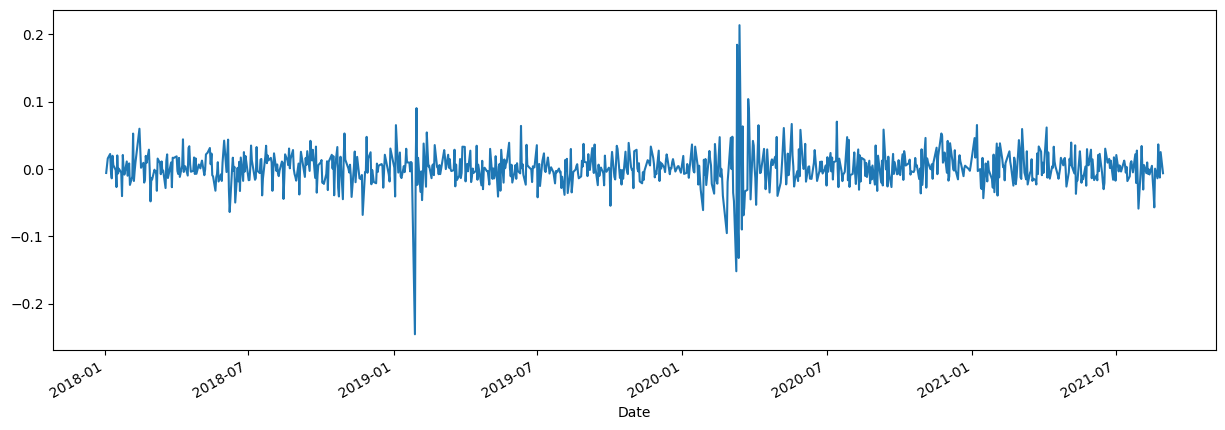

In [14]:
vale_retornos.plot()

In [15]:
# RETORNO LOG DIÁRIO

log_vale = np.log(vale/vale.shift(1)).dropna()
log_vale

Date
2018-01-03   -0.006010
2018-01-04    0.004091
2018-01-05    0.015489
2018-01-08    0.021984
2018-01-09   -0.003708
                ...   
2021-08-24    0.035837
2021-08-25   -0.002108
2021-08-26   -0.012846
2021-08-27    0.024735
2021-08-30   -0.006376
Name: VALE3.SA, Length: 905, dtype: float64

### c-) Faça um gráfico a série de log-retornos

<AxesSubplot: xlabel='Date'>

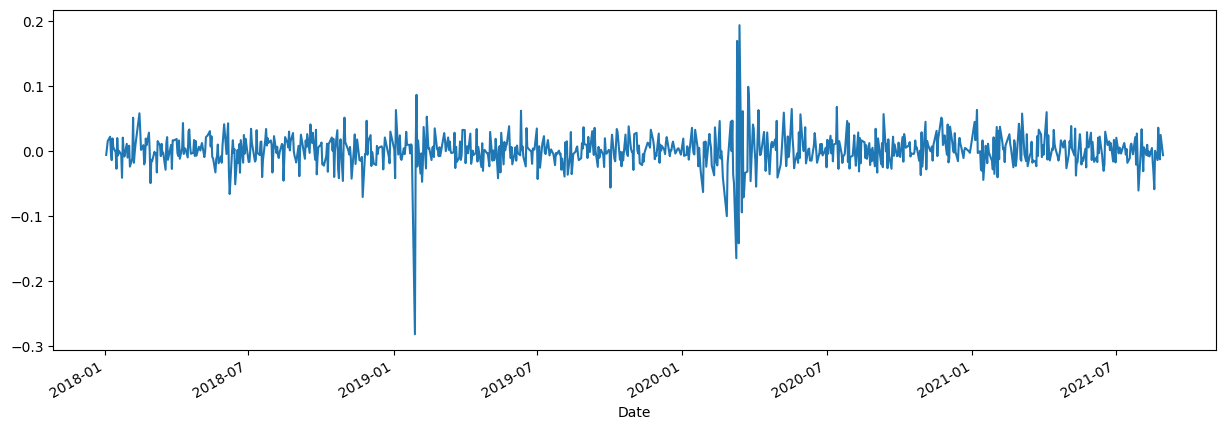

In [16]:
log_vale.plot()

### a-) Calcule o retorno  total (entre o valor final e o valor do começo) , pelo formato discreto (simples) e logarítmico das ações da Vale

In [17]:
# RETORNO SIMPLES TOTAL
ret_simples_vale = vale[-1]/vale[0] -1
print(f'{ret_simples_vale*100:.5}%')

184.38%


In [18]:
#RETORNO LOG TOTAL
ret_log_vale = np.log(1 + ret_simples_vale)
print(f'{ret_log_vale*100:.5}%')

104.51%


## Volatilidade

<p align='center'>
"Volatilidade é risco, mas não é todo o risco" (escutei ou li em algum lugar)
</p>




Uma das mais tradicionais, e simplistas, formas de se representar o risco em finanças é pelo desvio padrão dos retornos, chamada também de _Close-to-close volatility_ ou _historical Volatility_:

$\sigma =  \sqrt{\frac{\sum{}^N_{i}(r_{i} - \bar{r})²}{N-1}} $

Anualizando a fórmula:

$\sigma_{a}=\sigma_{d} * \sqrt{252} $


Há alternativas para se mensurar a volatilidade, são elas
* _Desvio padrão móvel_ ou _Desvio padrão corrido_
* _Média Móvel Simples (Simple Moving Average - SMA)_
* _Média Móvel Poderada Exponêncial (Exponentially Weighted Moving Average - EWMA)_
* _Semi-desvio (Semi deviation)_: volatilidade de uma subamostra de retornos negativos
* Outras medidas mais complexas como:
    * Parkinson Volatility
    * Garman Klass Volatility
    * Rogers-Satchell Volatility
    * Yang Zhang Volatility

...

Por fim, fica a reflexão do camarada: 

<p align='center'>
    <img  src = "imagens/reflexão_vol.png">
</p>



0utras fontes:

* https://www.ivolatility.com/help/6.html#sma
* https://portfolioslab.com/tools

In [19]:
vale

Date
2018-01-02    26.179436
2018-01-03    26.022564
2018-01-04    26.129236
2018-01-05    26.537113
2018-01-08    27.126965
                ...    
2021-08-24    74.195061
2021-08-25    74.038803
2021-08-26    73.093773
2021-08-27    74.924286
2021-08-30    74.448051
Name: VALE3.SA, Length: 906, dtype: float64

In [20]:
vale_retornos

Date
2018-01-03   -0.005992
2018-01-04    0.004099
2018-01-05    0.015610
2018-01-08    0.022227
2018-01-09   -0.003701
                ...   
2021-08-24    0.036487
2021-08-25   -0.002106
2021-08-26   -0.012764
2021-08-27    0.025043
2021-08-30   -0.006356
Name: VALE3.SA, Length: 905, dtype: float64

In [21]:
log_vale

Date
2018-01-03   -0.006010
2018-01-04    0.004091
2018-01-05    0.015489
2018-01-08    0.021984
2018-01-09   -0.003708
                ...   
2021-08-24    0.035837
2021-08-25   -0.002108
2021-08-26   -0.012846
2021-08-27    0.024735
2021-08-30   -0.006376
Name: VALE3.SA, Length: 905, dtype: float64

### Calcule a volatilidade nas formas: histórica (retornos diários), histórica anualizada,  desvio padrão móvel , SMA e EWMA

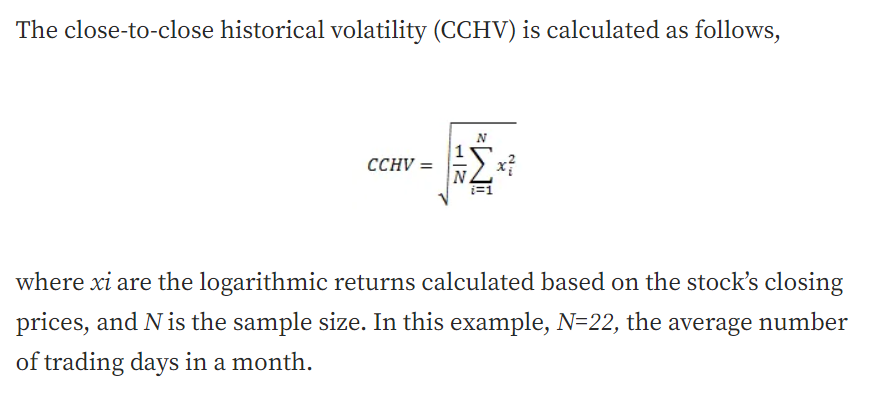

In [22]:
# RETORNOS DIÁRIOS

np.std(log_vale)

0.026652381569734398

In [23]:
# RETORNOS DIÁRIOS ANUALIZADOS

np.std(log_vale)*np.sqrt(992)

0.8394442493650237

In [24]:
# SMA - Simple Moving Avarage - Média Móvel Simples

sma_vale = vale_retornos.rolling(window=30).std() # mensal
sma_vale

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2021-08-24    0.021948
2021-08-25    0.021953
2021-08-26    0.021951
2021-08-27    0.022482
2021-08-30    0.022447
Name: VALE3.SA, Length: 905, dtype: float64

<AxesSubplot: xlabel='Date'>

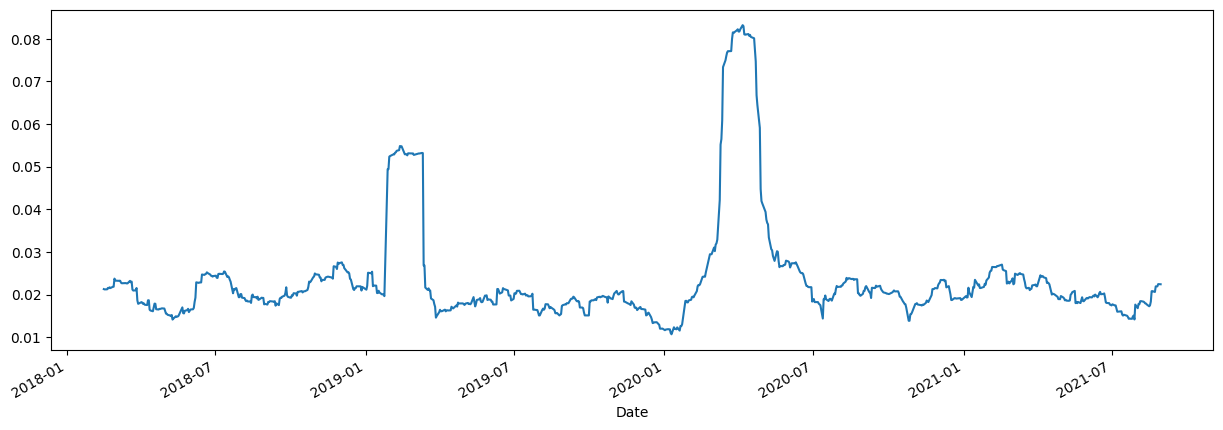

In [25]:
sma_vale.plot()

In [26]:
# EMWA - Exponentially Weighted Moving Average - Média Móvel Poderada Exponencial

ewma_vale = vale.ewm(span=12).mean() # span in months
ewma_vale

Date
2018-01-02    26.179436
2018-01-03    26.094464
2018-01-04    26.108035
2018-01-05    26.243478
2018-01-08    26.483518
                ...    
2021-08-24    76.942044
2021-08-25    76.495391
2021-08-26    75.972065
2021-08-27    75.810868
2021-08-30    75.601204
Name: VALE3.SA, Length: 906, dtype: float64

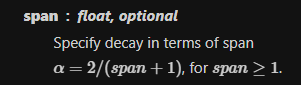

In [27]:
ewma_vale = vale.ewm(alpha=2/13).mean() #span in months
ewma_vale

Date
2018-01-02    26.179436
2018-01-03    26.094464
2018-01-04    26.108035
2018-01-05    26.243478
2018-01-08    26.483518
                ...    
2021-08-24    76.942044
2021-08-25    76.495391
2021-08-26    75.972065
2021-08-27    75.810868
2021-08-30    75.601204
Name: VALE3.SA, Length: 906, dtype: float64

<AxesSubplot: xlabel='Date'>

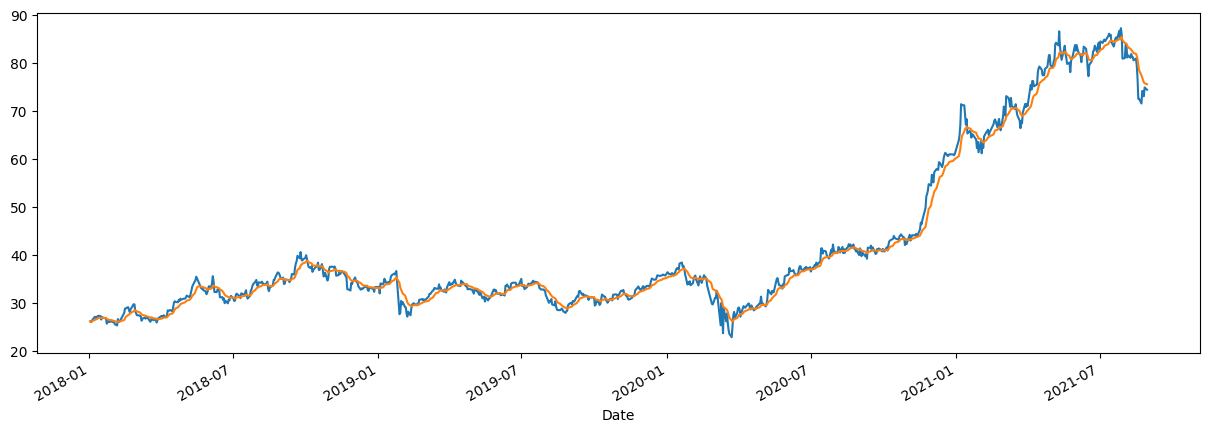

In [28]:
vale.plot()
ewma_vale.plot()

### __Desafio__: escolha uma das formas mais "complexas" e calcule a volatilidade

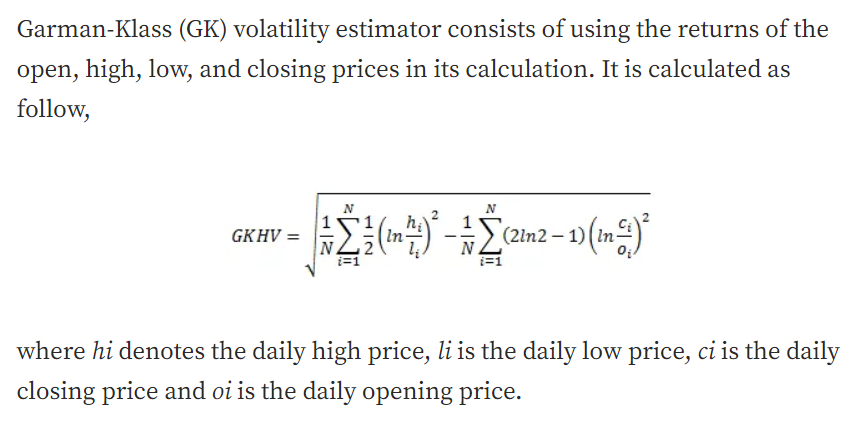

In [29]:
high_vale = df['High']['VALE3.SA']
low_vale = df['Low']['VALE3.SA']
open_vale = df['Open']['VALE3.SA']
close_vale = df['Close']['VALE3.SA']

gk_vale = np.sqrt(
    sum(((np.log(high_vale/low_vale))**2)/(2*906))
    - sum((np.log(close_vale/open_vale)**2) * (2*np.log(2)-1) /906 )
)


print(str(gk_vale*100) + str('%'))

1.8877604980217764%


----

## 4-) Estatística

<img src = "https://www.meme-arsenal.com/memes/e67609cded2cb9c7f9f120ffc8a0e5ea.jpg" >

<p align='center'>
    "As estatísticas corretas nos deixam sempre uma falsa impressão" - Stanislaw Ponte Preta, pseudônimo do Jornalista Sérgio Porto (1923-1968)
</p>

<p align='center'>    
    "Usa-se a estatística como um homem bêbado usa um poste, mais para apoiar que para iluminar" - Andrew Lang (1844-1912)
</p>

<p align='center'>    
    "I can prove anything by statistics except the truth." - George Canning
</p>





Estatística é uma área extremamente ampla, cujas ferramentas são primordiais para as Finanças ao embasarem diversas teorias, conceitos e fórmulas. Além disso, modelos estatísticos mais avançados são a base do Aprendizado de Máquinas (ou Aprendizado Estatístico), o qual encontra cada vez mais espaço nas finanças e possibilita estratégias de investimentos sistemáticos. Encontraremos alguns de suas apliações nos próximos desafios, por agora iremos focar em testar a normalidade dos retornos. 



Para isso é necessário ter em mente o conceito de __distribuição normal__ e desvios da normalidade, como __skewness__ e __kurtosis__. É importante lembrar que,por mais imperfeito que isso possa parecer, a ideia de que os retornos de instrumentos financeiros seguem uma distribuição normal embasa diversas teorias como 

* Teoria das Carteiras 
* Modelo de precificação dos ativos (Capital Asset Pricing Model - CAPM)
* Hipótese dos Mercados Eficientes (Efficient Market Hypotesis - EMH)
* Precificação de Opções

obs: recomendo utilizarem os pacotes  __statsmodels.api__ e __scipy.stats__ 

### a-) Uma forma de checarmos graficamente se os retornos seguem uma distribuição normal é fazendo o histograma dos log-retornos. Para as ações da Vale, do Itaú, da Klabin e da Minerva; faça  um histograma 


Dica: utilize a função do matplotlib da seguinte maneira __plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency', color='b')__

In [30]:
itau = df['Adj Close']['ITUB4.SA']
log_itau = np.log(itau/itau.shift(1)).dropna()

klabin = df['Adj Close']['KLBN4.SA']
log_klabin = np.log(klabin/klabin.shift(1)).dropna()

minerva = df['Adj Close']['BEEF3.SA']
log_minerva = np.log(minerva/minerva.shift(1)).dropna()

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  3.,  0.,  0.,
         0.,  1.,  0.,  3.,  2.,  0.,  4.,  8.,  9., 11.,  9., 10., 12.,
        23., 30., 31., 39., 52., 36., 45., 70., 71., 60., 55., 44., 40.,
        46., 41., 20., 27., 17., 17., 12.,  9., 10.,  7.,  7.,  3.,  5.,
         0.,  2.,  2.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.]),
 array([-0.10336713, -0.10039197, -0.09741681, -0.09444165, -0.09146649,
        -0.08849133, -0.08551618, -0.08254102, -0.07956586, -0.0765907 ,
        -0.07361554, -0.07064038, -0.06766522, -0.06469006, -0.0617149 ,
        -0.05873974, -0.05576458, -0.05278942, -0.04981426, -0.0468391 ,
        -0.04386395, -0.04088879, -0.03791363, -0.03493847, -0.03196331,
        -0.02898815, -0.02601299, -0.02303783, -0.02006267, -0.01708751,
        -0.01411235, -0.01113719, -0.00816203, -0.00518687, -0.00221171,
         0.00076344,  0.0037386 ,  0.00671376,  0.00968892,  0.01266408,
         0.01563

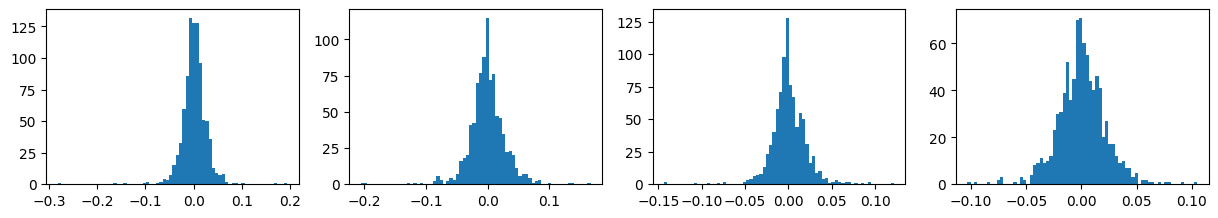

In [31]:
plt.subplot(2, 4, 1)
plt.hist(log_vale, bins=70, label='frequency')
plt.subplot(2, 4, 2)
plt.hist(log_minerva, bins=70, label='frequency')
plt.subplot(2, 4, 3)
plt.hist(log_klabin, bins=70, label='frequency')
plt.subplot(2, 4, 4)
plt.hist(log_itau, bins=70, label='frequency')

### b-) Outro teste gráfico é o Quantile-Quantile plots, ou QQ-plots. Procure saber sobre sua explicação. Escolha uma ação e faça uma "Plotagem"

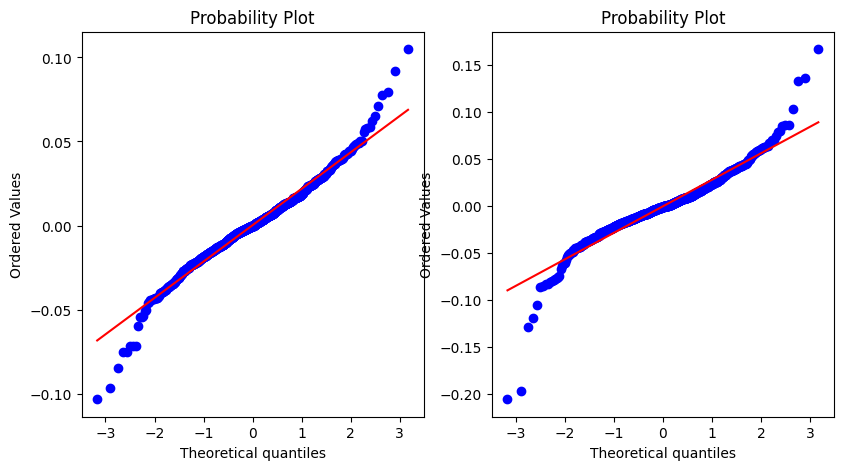

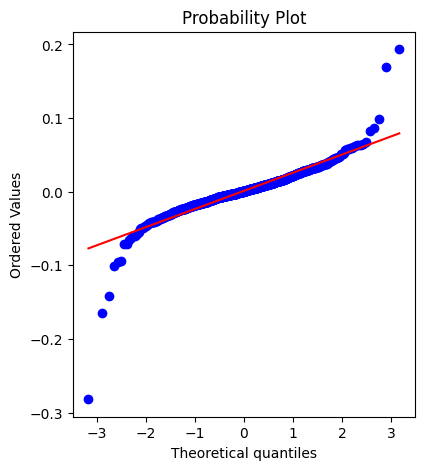

In [32]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 3, 1)
plt.title('itau')
stats.probplot(log_itau, dist="norm", plot=py)

plt.subplot(1, 3, 2)  
stats.probplot(log_minerva, dist="norm", plot=py)
py.show()

plt.subplot(1, 3, 3) 
stats.probplot(log_vale, dist="norm", plot=py)
py.show()

### c-) Visualizações gráficas não são suficientes. Calcule um conjunto de estatísticas (recomendo fazer uma função), contendo o tamanho da amostra, mínimo, máximo, média, desvio padrão, skew e kurtosis; para duas ações de sua escolha. Compare os valores

In [33]:
def stock_stats(stock):
    return stock.agg(['count','min','max','mean','std','skew','kurtosis'])

print(stock_stats(log_itau),"\n\n", stock_stats(log_minerva))

count       905.000000
min          -0.103367
max           0.104894
mean          0.000219
std           0.021903
skew         -0.045378
kurtosis      2.458198
Name: ITUB4.SA, dtype: float64 

 count       905.000000
min          -0.205485
max           0.167054
mean         -0.000153
std           0.029375
skew         -0.387473
kurtosis      7.471857
Name: BEEF3.SA, dtype: float64


### d-) Faça testes estatísticos de signficância estatística para as ações que escolheu anteriormente. Eles podem ser obtidos pelas funções do scipy.stats:

* skewtest()
* kurtosistest()
* normaltest()

obs:os retornos __não__ são normalmente distribuídos caso o valor-p for abaixo de 0.05


Responda, posteriormente, se os retornos das ações escolhidas são normalmente distribuídos

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

In [34]:
print('Teste para ITAU:\n', stats.skewtest(log_itau),'\n',
stats.kurtosistest(log_itau),'\n',
stats.normaltest(log_itau),'\n')

print('Teste para VALE:\n', stats.skewtest(log_vale),'\n',
stats.kurtosistest(log_vale),'\n',
stats.normaltest(log_vale))

Teste para ITAU:
 SkewtestResult(statistic=-0.5606189071443539, pvalue=0.5750573595225728) 
 KurtosistestResult(statistic=7.487533705738875, pvalue=7.017984503957761e-14) 
 NormaltestResult(statistic=56.37745455362346, pvalue=5.725208294578092e-13) 

Teste para VALE:
 SkewtestResult(statistic=-11.004029444358213, pvalue=3.6542952385570674e-28) 
 KurtosistestResult(statistic=15.548050713469843, pvalue=1.640224606830778e-54) 
 NormaltestResult(statistic=362.8305450009326, pvalue=1.6306029364142413e-79)


----

## 5-) Processos estocáticos  


<img src = 'http://media3.giphy.com/media/YPBvdXHxANHHi/giphy.gif'>


<p align='center'>
"Predictability is not how things will go, but how they can go"- Raheel Farooq
</p>


<p align='center'>
"A fortuna troca, às vezes, os cálculos da natureza" - Machado de Assis (1839-1908)
</p>


### Introdução

Um processo estocástico, a grosso modo, é uma sequência de variáveis aleatórias. A palavra estocástica significa probabilística, oposta à Ao palavra determinística em que por meio de uma equação é possível saber o resultado exato (pense numa equação y = ax + b, caso conhecermos todos os parâmetros, a partir de uma observação de x poderemos __determinar__ o y).

Caso queira saber mais (não será necessário para resolver o exercício), acesse os links:

* [Cadeias de Markov: Caminhadas aleatórias (Teoria e Simulação) - Aula 3](https://www.youtube.com/watch?v=cwhQYqR_Iag&list=PLSc7xcwCGNh0jSylDm0QrDJaFTC3vAbvc&index=5) 
* [O que são processos estocásticos?](https://www.youtube.com/watch?v=WOWi6dswgkY&list=PLSc7xcwCGNh0jSylDm0QrDJaFTC3vAbvc&index=1)

Dentro desse assunto temos o conceito de "passeios aleatórios", que são objetos matemáticos cujos caminhos consistem em, como o próprio nome sugere, uma sucessão de movimentos aleatórios, podendo representar o deslocamento de uma molécula em um gás, processos de difusão de partículas, o andar de um bêbado, ou o comportamento de ativos no mercado financeiro, já que eles sofrem diversas influências externas, fazendo seu movimento ser entendido como aleatório (tornando-os difíceis de serem previstos).

## VER! FONTE
https://www.interviewqs.com/blog/intro-monte-carlo

### a-) Gere uma série de retornos "previstos" por uma caminhada aleatória 

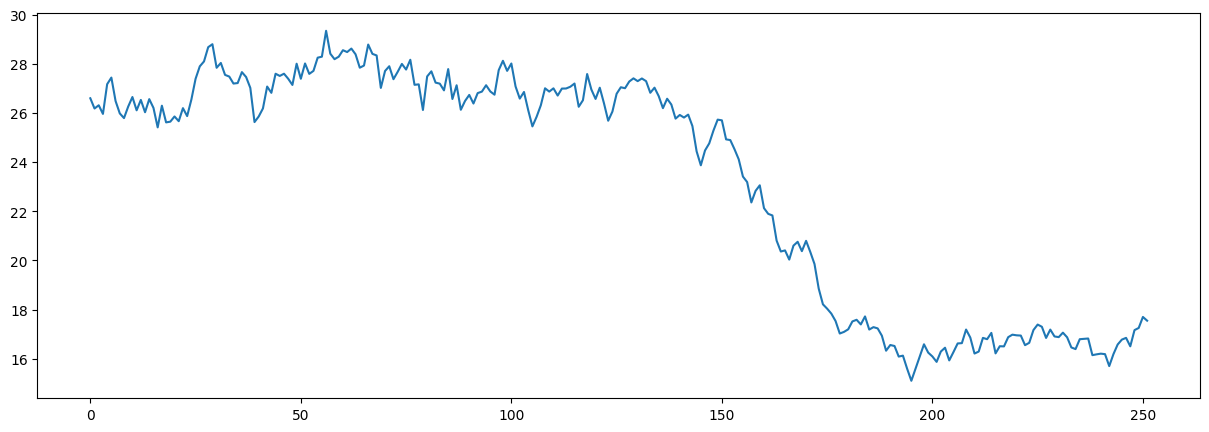

In [35]:
returns = df['Adj Close']['ITUB4.SA'].pct_change()
daily_vol = returns.std()

T = 252
count = 0
price_list = []
last_price = df['Adj Close']['ITUB4.SA'][-1]

price = last_price * (1 + np.random.normal(0, daily_vol))
price_list.append(price)

for y in range(T):
    if count == 251:
        break
    price = price_list[count]* (1 + np.random.normal(0, daily_vol))
    price_list.append(price)
    count += 1

plt.plot(price_list)
plt.show()

C:\Users\loren\AppData\Local\Temp\ipykernel_18424\1114103732.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = price_list
C:\Users\loren\AppData\Local\Temp\ipykernel_18424\1114103732.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = price_list
C:\Users\loren\AppData\Local\Temp\ipykernel_18424\1114103732.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

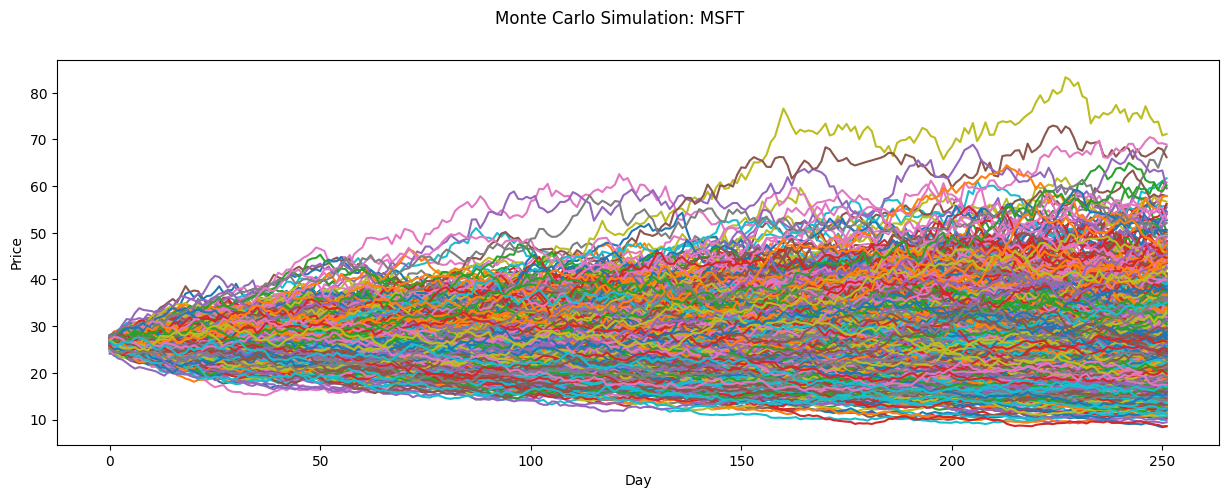

In [36]:
NUM_SIMULATIONS =  1000
df = pd.DataFrame()
last_price_list = []
for x in range(NUM_SIMULATIONS):
    count = 0
    price_list = []
    price =  (1 + np.random.normal(0, daily_vol)) * last_price
    price_list.append(price)
    
    for y in range(T):
        if count == 251:
            break
        price = price_list[count]* (1 + np.random.normal(0, daily_vol))
        price_list.append(price)
        count += 1
        
    df[x] = price_list
    last_price_list.append(price_list[-1])
        
fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: MSFT")
plt.plot(df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [37]:
print("Expected price: ", round(np.mean(last_price_list),2))
print("Quantile (5%): ",np.percentile(last_price_list,5))
print("Quantile (95%): ",np.percentile(last_price_list,95))

Expected price:  27.24
Quantile (5%):  14.337352515076624
Quantile (95%):  46.447913707739325


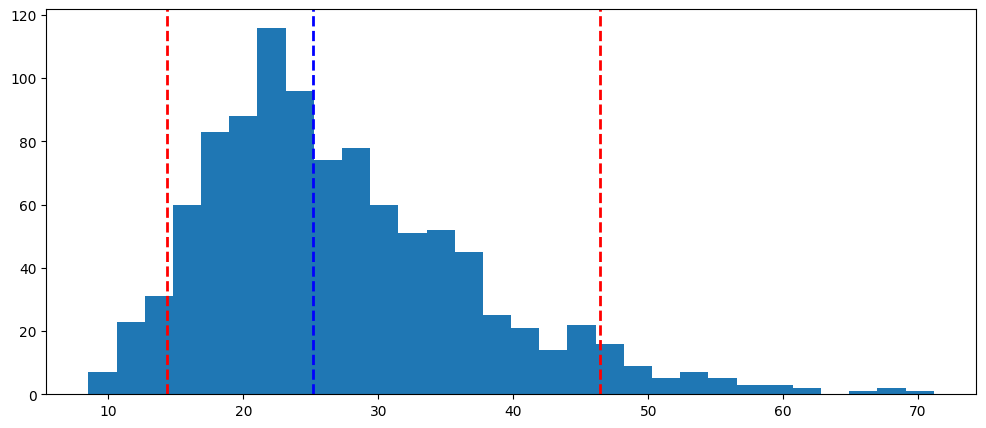

In [38]:
plt.figure(figsize=(12,5))
plt.hist(last_price_list,bins=30)
plt.axvline(np.percentile(last_price_list,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(last_price_list,95), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(last_price_list,50), color='b', linestyle='dashed', linewidth=2)
plt.show()

In [39]:
stock_stats(itau)

count       906.000000
min          17.263884
max          31.511492
mean         25.284053
std           3.284015
skew         -0.319088
kurtosis     -0.874287
Name: ITUB4.SA, dtype: float64

----

## 6-) Portfólio de investimento



### Métricas de desempenho de uma carteira de investimentos

__Retorno__:  

No tópico 2, já vimos como calcular o retorno de um portfólio com dois  ativos. Segue a generalização:

$R_p = R_{a1}w_{a1} + R_{a2}w_{a2} + R_{a3}w_{a3} + ...+ R_{an}w_{an}$

* $R_p$: retorno do portfólio
* $R_{an}$: retorno do ativo "n"
* $w_{an}$ : peso do ativo "n"

Uma maneira mais eficiente de generalizá-la é através da fórmula matricial, dada por: 
$R_p = \vec{r} \times \vec{w}$

* $\vec{r}$ : vetor contendo o retorno dos ativos
* $\vec{w}$ : vetor contendo o peso dos ativos na carteira

obs: a soma dos pesos precisa ser igual a 1, por hora, assuma que os pesos não podem ser negativos (não estaremos vendidos em nenhuma ação, apenas comprados)
 

__Volatilidade__:

Contraintuitivamente, a volatilidade de um portfólio não é calculada a partir do desvio padrão de seus retornos. Sua fórmula (matricial) é a seguinte:

$\sigma_{P} = \sqrt{w_{T} \cdot \Sigma{}  \cdot w}$


* $\sigma_{P}$ : volatilidade do portfólio
* $\Sigma$ : matriz de covariância dos retornos
* $w$: pesos dos ativos
* $w_{T}$: peso dos ativos transpostos

### Você deverá montar um portfólio com 10 ações. Como você já sabe importar dados financeiros, fique livre para escolher os ativos/ações de seu preferência,  
designando os pesos para cada um dos ativos ou optand. 

### a-) Calcule o retorno anualizado do portfólio

In [40]:
carteira_words = ['FLEURY','ENGIE','WEG','ITAU','PORTOSEGURO','SANEPAR','LOCALIZA','TRANSPAULISTA (ISA CTEEP)','MULTIPLAN','RAIADROGASIL']
carteira = ['FLRY3.SA', 'EGIE3.SA', 'WEGE3.SA', 'ITUB4.SA', 'PSSA3.SA', 'SAPR4.SA', 'RENT3.SA', 'TRPL4.SA', 'MULT3.SA', 'RADL3.SA']

data = yf.download(carteira, start='2018-01-01',end='2021-12-31')
df = pd.DataFrame(data)['Adj Close'].pct_change().dropna()
df

[*********************100%***********************]  10 of 10 completed


,EGIE3.SA,FLRY3.SA,ITUB4.SA,MULT3.SA,PSSA3.SA,RADL3.SA,RENT3.SA,SAPR4.SA,TRPL4.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-03,-0.006719,-0.019570,0.006837,0.004014,0.018132,-0.024765,0.013620,-0.003540,-0.020330,-0.015188
2018-01-04,-0.012965,-0.020007,0.020824,-0.001103,0.000810,0.007709,0.014304,-0.013322,-0.027416,-0.009741
2018-01-05,0.005140,0.014432,0.002882,0.007315,0.019412,0.017550,-0.014530,0.017102,0.016041,0.004099
2018-01-08,0.005682,-0.026023,-0.003317,-0.012468,-0.005025,-0.012714,-0.004770,0.000000,-0.005211,0.008163
2018-01-09,0.000000,-0.028856,-0.010869,0.002914,0.006911,-0.013998,-0.008279,-0.009734,0.006471,0.016195
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.001810,-0.002867,0.005182,-0.004235,0.014563,0.000831,-0.015996,-0.005195,-0.007204,-0.005940
2021-12-27,0.001295,0.011501,0.010309,0.004253,0.004785,-0.001245,0.005480,0.005222,0.001236,-0.008963
2021-12-28,0.003881,0.009665,-0.003710,0.015352,-0.005714,-0.014956,-0.027248,0.007792,-0.002058,0.003618


In [41]:
x = 0.1
pesos = [x,x,x,x,x,x,x,x,x,x]

retornos = pd.DataFrame(df @ pesos)[0]
retornos

Date
2018-01-03   -0.004751
2018-01-04   -0.004091
2018-01-05    0.008944
2018-01-08   -0.005568
2018-01-09   -0.003925
                ...   
2021-12-23   -0.002267
2021-12-27    0.003387
2021-12-28   -0.001338
2021-12-29   -0.008057
2021-12-30    0.007066
Name: 0, Length: 988, dtype: float64

### b-) Calcule a volatilidade anualizada do portfólio

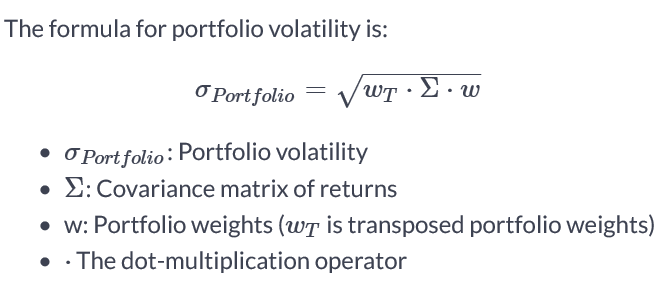

In [42]:
portfolio_cov = df.cov()
vol_acum = np.sqrt(np.transpose(pesos) @ portfolio_cov @ pesos)
vol_acum

0.015378856676419162

In [43]:
vol_anual = vol_acum*np.sqrt(252)
vol_anual

0.24413178128586258

### c-) Calcule os retornos diários do portfólio, calcule seu retorno acumulativo e compare com algum Benchmark (CDI, IBOVESPA, IBrX)

In [44]:
ret_acum = (retornos + 1).cumprod()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

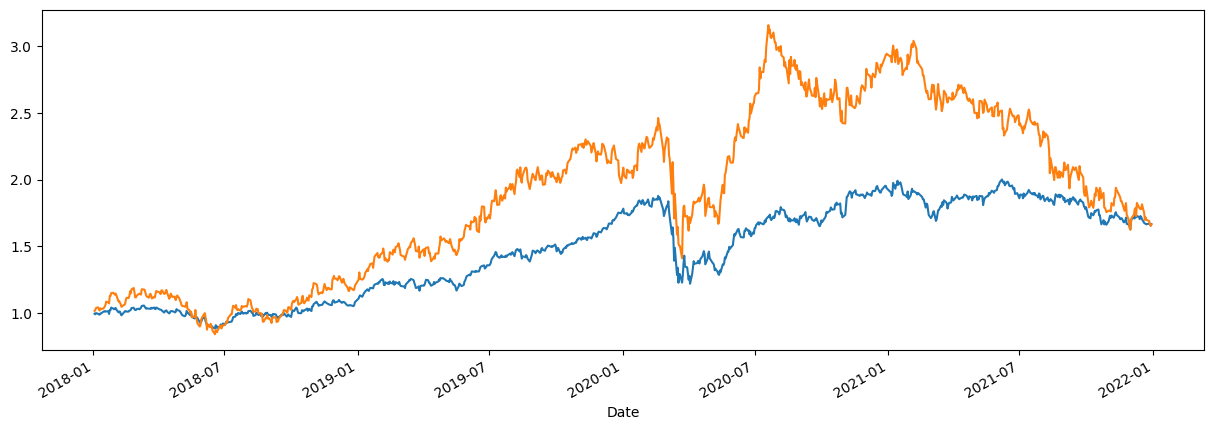

In [45]:
b3 = yf.download('B3SA3.SA', start='2018-01-01',end='2021-12-31')
b3 = b3['Adj Close'].pct_change().dropna()
b3_acum = (b3 + 1).cumprod()
ret_acum.plot()
b3_acum.plot()

In [46]:
port_ret_total = np.sum(retornos)
b3_ret_acum = np.sum(b3)
print(f"retorno total do portfolio é igual a {port_ret_total*100:.5} %")
print(f"retorno acumulado da b3 no mesmo período é igual a {b3_ret_acum*100:.5} %")

retorno total do portfolio é igual a 62.916 %
retorno acumulado da b3 no mesmo período é igual a 84.632 %


### d-) Provavelmente já deve ter se deparado com o conceito de correlação em estatística. Faça a matriz de correlação (método de person) para os ativos do portfólio que montou. Com o intuito de aumentar a elegância, faça um heatmap dessa matriz.Por fim, reflita o que a correlação entre os ativos pode dizer sobre seu portfólio. Para ajudar na sua reflexão fique com a frase de Harry Markowitz: “Tratando-se de finanças, diversificação é o único almoço grátis”

<AxesSubplot: >

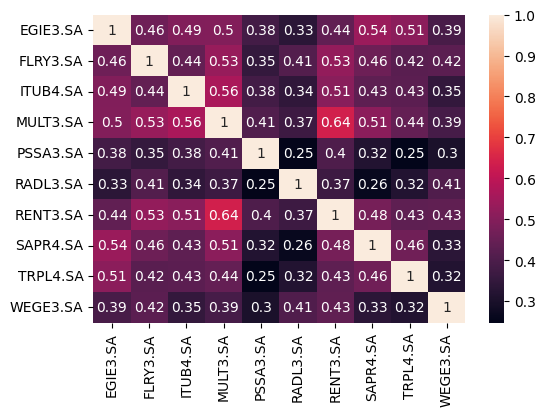

In [47]:
corr = df.corr()

plt.rcParams['figure.figsize'] = (6, 4)

corr_matrix = sns.heatmap(corr, annot=True)
corr_matrix

### Teoria moderna das carteiras (Modern Portfolio Theory - MPT)

__Pressupostos__:

* Não é possível estar vendido em uma ação (short)
* 100% da riqueza do invstidor necessita estar depositada (soma dos pesos igual a 1)
* _Trade-off_ entre risco e retorno: maior incerteza (risco) é compensada com maior recompensa (retorno)
* Retorno Esperado no futuro: média do retorno histórico (conceito de esperança matemática) 

__Explicação básica__:

* Podemos compor diversos portfólios diferentes ao alterarmos o peso dado aos ativos
* Diferentes pesos resultam em diferentes pares (risco, retorno)
    * Mudar os pesos = ajustar a exposição do investidor ao risco  
* O desafio é: encontrar uma combinação de pesos para maximizar o retorno, dado um nível de risco
    *  Tal combinação resulta em um __portfólio eficiente__
* A região do gráfico (retorno esperado, vol) onde se encontram os portfólios eficientes é chamada de fronteira eficiente


### e-) Plote um gráfico contendo a relação riscoXretorno de diversos portfólios possíveis. Evidencie a Fronteira eficiente

In [48]:
# aleatorizar pesos pra carteira
# calcular retorno e volatilidade de cada carteira aleatória
# repetir 100000 vezes

num_port = 100000
retornos_esperados = []
risco_esperado = []

for i in range(num_port):
    #pesos
    pesos = np.random.random(10)
    pesos = pesos/np.sum(pesos) * 1

    #risco = dp
    cov = df.cov()
    volatilidade = np.sqrt(np.dot(
    np.transpose(pesos), np.dot(cov, pesos)))
    risco_esperado.append(volatilidade)

    #retorno
    retornos = np.dot(df.mean(), pesos)

    retornos_esperados.append(retornos)

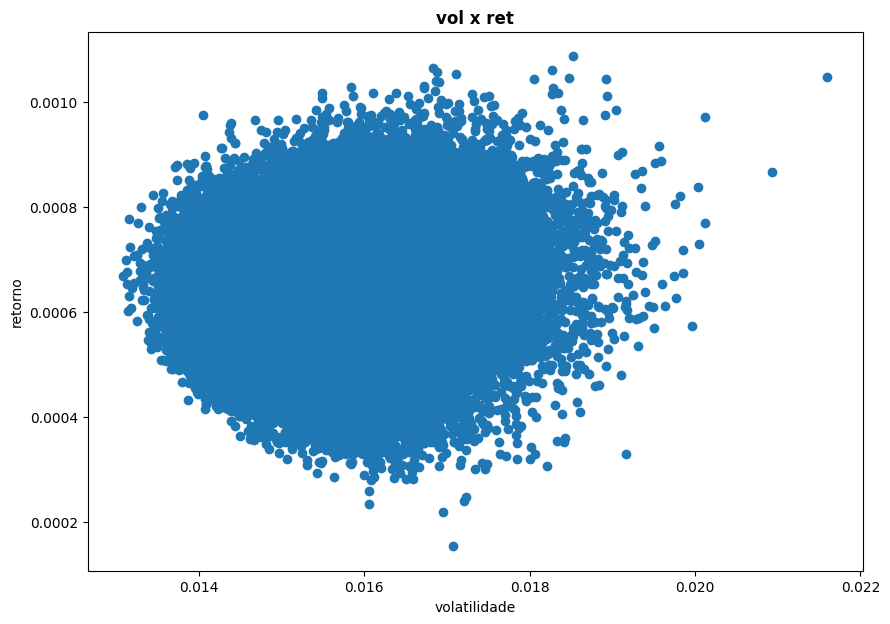

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 7])

ax.scatter(risco_esperado, retornos_esperados)

ax.set_xlabel('volatilidade')
ax.set_ylabel('retorno')
ax.set_title(f'vol x ret', fontweight = 'bold')

plt.show()

### Falta fazer a fronteira eficiente

### EXTRA: reflita sobre quais os problemas e limitações da teoria de Markowitz (pesquise a vontade)

----

## 7-) Gestão de Risco

<p align='center'>
"Um navio no porto está em segurança, mas não é para isso que os navios são feitos" - John Sheed
</p>

<p align='center'>
"O pior risco é não correr risco nenhum" - Nicolas Sarcozy
</p>

<p align='center'>
"Há duas ocasiões na vida em que uma pessoa não deve jogar: quando não tiver posse para isso ... e quando tiver" - Mark Twain
</p>

Como você já deve saber, risco em finanças emerge da incerteza de futuros lucros ou retornos. A Gestão de risco financeiro moderna é algo extremamente objetivo. Por mais que sejam utilizados ferramentais matemáticos e estatísticos (tomando um caráter científico), modelos de risco sempre estão sujeitos a serem aplicados incorretamente, a terem pressupostos errados ou a empresentarem resultados ruins. Nessa etapa você aplicará algumas dessas ferramentas mais básicas .





### DRAWDOWN

Para melhor avaliar o desempenho de um portfólio, é necessário calcular o Drawdown Histórico. Sua fórmula é dada por:

$DD = \frac{r_t}{RM}-1$

sendo:
*  $r_t$ o retorno acumulado até o momento t e RM o máximo até o momento

O objetivo de toda estratégia de investimentos é apresentar o menor Drawdown histórico possível. Você deverá  analisar o Drawdown histórico da carteira que você montou na última etapa (suponha desembolsou R$100.000,00 nessa estratégia). Para isso, plote um gráfico que informe sobre essa medida de risco e responda:

* a-) Qual foi o patrimônio mínimo
* b-) Qual foi a maior queda do patrimônio em R$
* c-) Qual foi a maior queda percentual do patrimônio
* d-) A data da maior queda
* e-) A maior duração do Drawdown

In [50]:
# retornos diários por ação
df 

# retornos acumulados por ação
ret_cum_por_acao = df.sum()
ret_cum_por_acao

EGIE3.SA    0.657491
FLRY3.SA   -0.117355
ITUB4.SA    0.085728
MULT3.SA    0.195510
PSSA3.SA    0.545427
RADL3.SA    0.551909
RENT3.SA    1.404296
SAPR4.SA    0.452114
TRPL4.SA    0.934744
WEGE3.SA    1.581733
dtype: float64

In [51]:
ret_total = ret_cum_por_acao.sum()
ret_total
print(f'retorno total é de {ret_total/10*100:.5} %\nou seja, o montante equivale a {100 + ret_total/10*100:.6} % do total investido')

retorno total é de 62.916 %
ou seja, o montante equivale a 162.916 % do total investido


In [52]:
meu_retorno = 100000 * (ret_cum_por_acao) /10 
meu_retorno

EGIE3.SA     6574.906664
FLRY3.SA    -1173.547246
ITUB4.SA      857.282575
MULT3.SA     1955.098812
PSSA3.SA     5454.271002
RADL3.SA     5519.088716
RENT3.SA    14042.964192
SAPR4.SA     4521.144101
TRPL4.SA     9347.437396
WEGE3.SA    15817.329295
dtype: float64

In [53]:
meu_ret_total = meu_retorno.sum()
meu_ret_total
print(f'meu retorno total é de {meu_ret_total:.7}\nou seja, o montante final equivale a {100000 + meu_ret_total:.7}')

meu retorno total é de 62915.98
ou seja, o montante final equivale a 162916.0


In [54]:
ret_por_dia = np.transpose(df).mean()
ret_por_dia

Date
2018-01-03   -0.004751
2018-01-04   -0.004091
2018-01-05    0.008944
2018-01-08   -0.005568
2018-01-09   -0.003925
                ...   
2021-12-23   -0.002267
2021-12-27    0.003387
2021-12-28   -0.001338
2021-12-29   -0.008057
2021-12-30    0.007066
Length: 988, dtype: float64

In [55]:
ret_cum_por_dia = ret_por_dia.cumsum()
ret_cum_por_dia

Date
2018-01-03   -0.004751
2018-01-04   -0.008842
2018-01-05    0.000103
2018-01-08   -0.005466
2018-01-09   -0.009390
                ...   
2021-12-23    0.628102
2021-12-27    0.631489
2021-12-28    0.630151
2021-12-29    0.622094
2021-12-30    0.629160
Length: 988, dtype: float64

In [56]:
meu_ret_todo_dia = ret_cum_por_dia *100000
meu_ret_todo_dia

Date
2018-01-03     -475.090033
2018-01-04     -884.151695
2018-01-05       10.272790
2018-01-08     -546.568528
2018-01-09     -939.023384
                  ...     
2021-12-23    62810.202222
2021-12-27    63148.924215
2021-12-28    63015.132663
2021-12-29    62209.414714
2021-12-30    62915.975507
Length: 988, dtype: float64

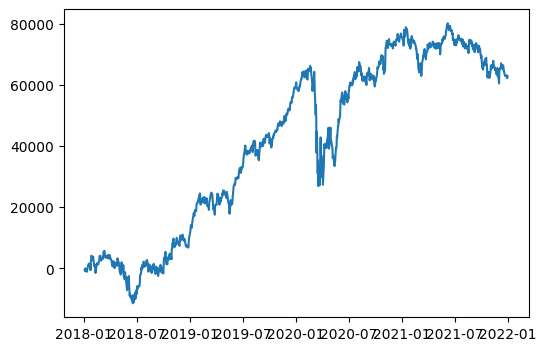

In [57]:
plt.plot(meu_ret_todo_dia)

In [58]:
meu_pat_todo_dia = meu_ret_todo_dia + 100000

In [59]:
# drawdown
dd = ret_cum_por_dia / ret_por_dia.cummax() - 1
dd

Date
2018-01-03    0.000000
2018-01-04    1.161414
2018-01-05   -0.988515
2018-01-08   -1.611084
2018-01-09   -2.049863
                ...   
2021-12-23    8.094904
2021-12-27    8.143951
2021-12-28    8.124578
2021-12-29    8.007910
2021-12-30    8.110220
Length: 988, dtype: float64

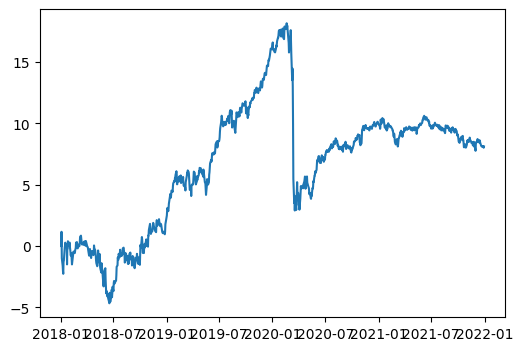

In [60]:
plt.plot(dd)

In [61]:
dd.pct_change()[2:]

Date
2018-01-05   -1.851130
2018-01-08    0.629803
2018-01-09    0.272350
2018-01-10    0.102565
2018-01-11   -0.443311
                ...   
2021-12-23   -0.004039
2021-12-27    0.006059
2021-12-28   -0.002379
2021-12-29   -0.014360
2021-12-30    0.012776
Length: 986, dtype: float64

In [62]:
# a) Qual foi o patrimônio mínimo
pat_min = min(meu_pat_todo_dia)
print(f'o patrimônio mínimo foi de {pat_min:.7}')

# b) Qual foi a maior queda do patrimônio em R$
max_dd = (dd.min() - 100000)
print(f'a maior queda nominal de patrimônio foi de {max_dd:.7}')

# c) Qual foi a maior queda percentual do patrimônio
max_queda = min(dd.pct_change()[1:])
print(f'a maior queda percentual foi de {max_queda:.7} %')

# d) A data da maior queda
# e) A maior duração do Drawdown

o patrimônio mínimo foi de 88583.04
a maior queda nominal de patrimônio foi de -100004.7
a maior queda percentual foi de -18.32007 %


### Value at Risk (VaR)

Outra forma para medir o rico de perda é a ferramente chamada de Value at Risk (VaR). Há diversos tipos de VaR, mas seu princípio é representar, em um número, o risco de um produto financeiro ou de uma carteira relacionado a sua __perda potencial máxima__ para um __dado horizonte__ e com um __intervalo de confiança__ (normalmente 95%, 97,5%, 99%, 99.9%), ou seja, é o risco de enventos extremos na distribuição de perdas (retornos negativos).

### a-)  Calcule o VaR histórico do portfólio montado na etapa 6. Considere os intervalos de confiança 95%, 97,5%, 99%, 99.9%

In [63]:
q950 = df.quantile(.05).mean() 
q975 = df.quantile(.025).mean() 
q990 = df.quantile(.01).mean()
q999 = df.quantile(.001).mean() 
print(f'{q950:.3}\n{q975:.3}\n{q990:.3}\n{q999:.4}')

-0.0306
-0.0389
-0.0548
-0.1126


In [64]:
q950 = df.quantile(.05).mean() * 100000
q975 = df.quantile(.025).mean() * 100000
q990 = df.quantile(.01).mean() * 100000
q999 = df.quantile(.001).mean() * 100000
print(f'{q950:.6}\n{q975:.6}\n{q990:.6}\n{q999:.6}')

-3055.17
-3891.0
-5479.15
-11261.0


### b-) Faça um histograma da distribuição dos retornos, indicando a linha vertical que delimita o var VaR como

obs: também podemos fazer o grafíco contendo a distribuição das perdas (oposto do retorno), ou seja :

$L = - R$ 

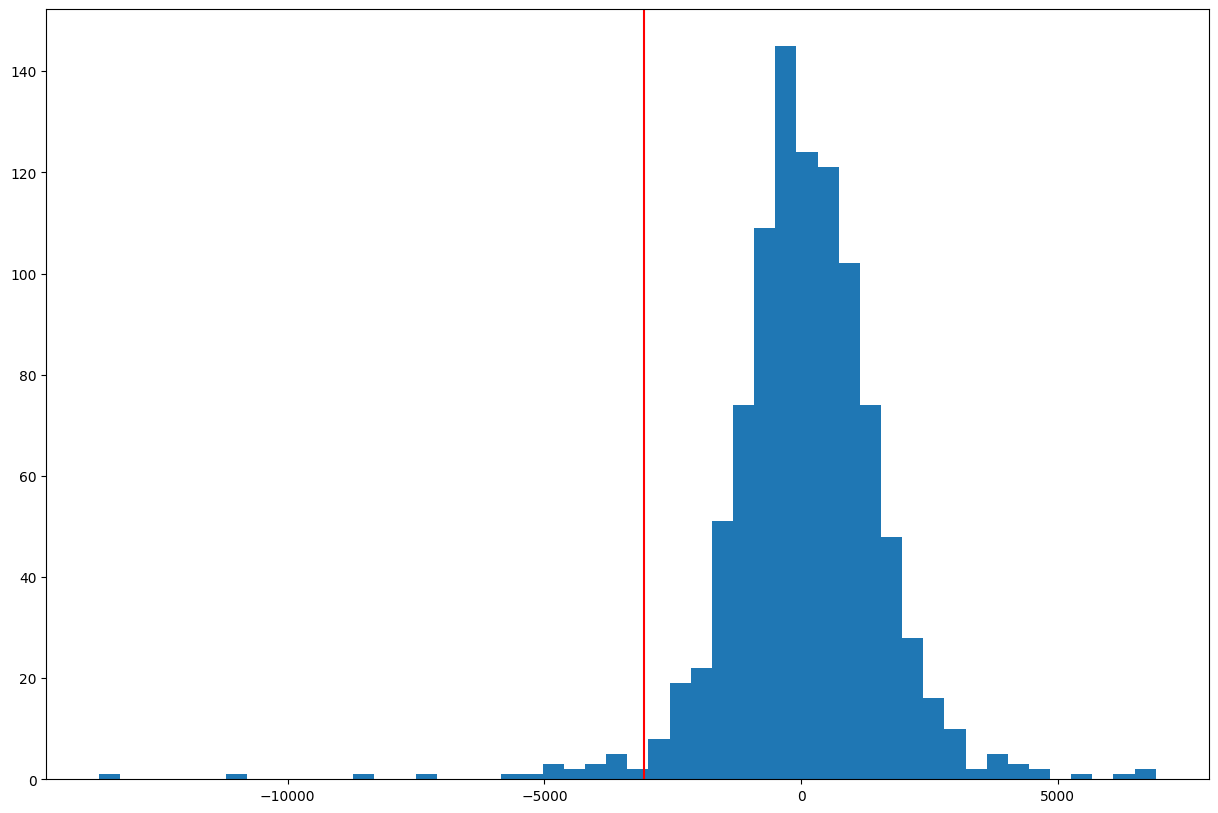

In [65]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.hist(ret_por_dia*100000, bins=50)
plt.axvline(q950, color='red')

### CVaR:

O Conditional Value at Risk é variação do VaR, porém ele procura mensurar a perda esperada nos piores 1-x% cenários. Em outras palavras, um CVaR(95), por exemplo, busca responder o quanto excederiam as perdas __em média__ nos 5% piores casos. 

Estatísticamente, ele é a esperança matemática da cauda da distribuição de perdas

$CVaR(\alpha) := \frac{1}{1-\alpha} \mathbb{E} \int_{VaR(\alpha)}^{\bar{x}} xf(x)dx$

sendo: 

* $f(.)$ : função densidade de probabilidade (probability density function - pdf)
* $\bar{x}$: limite superior (pode ser infinito)
* $VaR(\alpha)$ : VaR em um intervalo de confiança de $\alpha$


<img src ='https://www.researchgate.net/publication/321925061/figure/fig1/AS:573442517934080@1513730758570/represents-the-CVaR-in-terms-of-costs.png'>


### c-) Compute o o CVaR histórico (não é necessário modelar os retornos como uma distribuição normal) nos 5% piores casos. 



In [66]:
# Cria a função do CVAR 
var = q950 / 100000
cvar = np.nanmean(returns[returns < var])
cvar

-0.044023643604754886

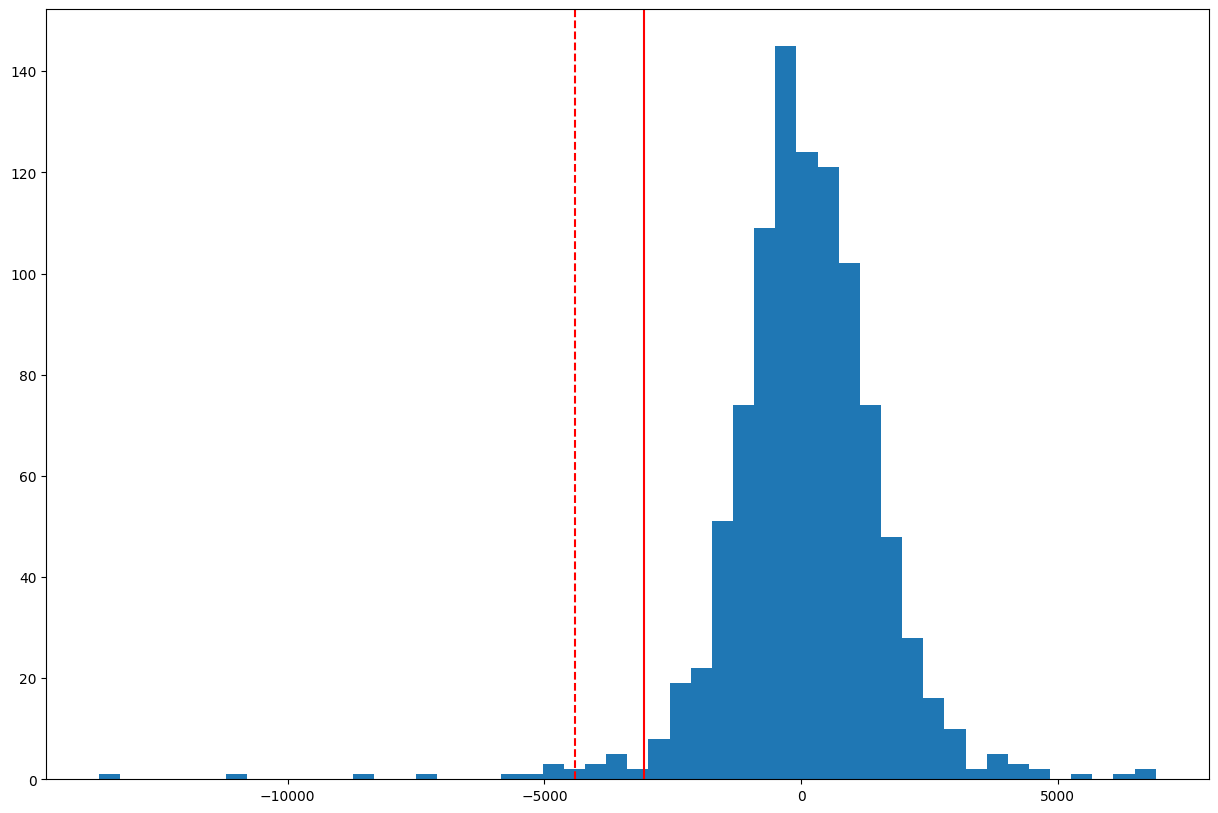

In [67]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.hist(ret_por_dia*100000, bins=50)
plt.axvline(q950, color='red')
plt.axvline(cvar*100000, color='red', linestyle='dashed')

### VaR Paramétrico e não Paramétrico

* "VaR Paramétrico baseia-se no conhecimento prévio de uma distribuição estatística (Ex.: Curva Normal) para fazer o cálculo das perdas financeiras com base em hipótese de comportamento da distribuição de probabilidades dos retornos dos ativos. "

* "O VaR Não Paramétrico não faz hipótese alguma sobre a distribuição de probabilidade dos retornos dos ativos. Nestas técnicas (Ex.: Simulação Histórica, Simulação de Monte Carlo) são utilizadas a história dos próprios retornos para obtenção de informações sobre as perdas financeiras"

fonte :
[Value at Risk - wikipedia (link)](https://pt.wikipedia.org/wiki/Value_at_Risk)


Nessa etapa não haverá exercícios, repare até agora você só calculou medidas NÃO paramétricas, já que não fora exigido que se modelasse a série de perdas (assumindo uma distribuição específica). Realize as versões paramétricas para o VaR e o CVaR, assumindo uma distribuição normal.


Dica:
```{python} 
from scipy.stats import norm 
```

In [68]:
import scipy as sp

In [1]:
from scipy.stats import norm

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

ax.hist(ret_por_dia, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

NameError: name 'np' is not defined

In [70]:
z = sp.stats.norm.ppf(0.05)

In [71]:
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)

NameError: name 'port_mean' is not defined

----

----

## 8-) Algotrading


<div style="font-style: italic; text-align: center;" markdown="1">
People worry that computers will get too smart and take over the world, but the real problem is that they’re too stupid and they’ve already taken over the world - Pedro Domingos 

</div>

Uma das áreas que podemos seguir dentro do grupo de finanças quantitativas é a elaboração de algoritmos (procedimentos feitos pelo computador) que realizem estratégias de trading cuja performance for previamente avaliada por backtests. 

Uma ideia extremamente simples (e ingênua) é desenvolver estratégias de trading baseadas no cruzamento de médias móveis (simples) dos preços dos ativos (sendo uma delas uma média móvel curta e outra longa). Com o intuito de treinar o raciocínio para esse assunto, você terá que implementar uma seguinte estratégia:



* "Quando a média móvel curta estiver maior que a média móvel, longa deve-se permanecer comprado. Quando ocorrer o contrário, deve-se permanecer vendido"



Leia o segundo tópico (__"Strategies Based on Simple Moving Averages"__) do livro (__Python for Algorithmic Trading - From Idea to Cloud Deployment__, de Yves Hilpisch)

### a-) Nesse exercício, adote a média móvel curta com 42 dias e a longa com 252. Faça o backtest nas ações da Minerva (BEEF3), com início em 1/01/2015 até 31/08/2020. Faça gráficos para ilustrar a estratégia

In [ ]:
minerva = yf.download('BEEF3.SA', start = '2015-01-01', end = '2020-08-31', progress= False)['Adj Close']
minerva

Date
2015-01-02     7.316798
2015-01-05     6.969481
2015-01-06     6.869145
2015-01-07     7.324516
2015-01-08     7.293644
                ...    
2020-08-24    11.148993
2020-08-25    10.915041
2020-08-26    10.906975
2020-08-27    10.632687
2020-08-28    10.656888
Name: Adj Close, Length: 1409, dtype: float64

In [ ]:
import vectorbt as vbt

mean42 = vbt.MA.run(minerva, 42)
mean252 = vbt.MA.run(minerva, 252)
                     
entradas = mean42.ma_crossed_above(mean252)
saidas = mean42.ma_crossed_below(mean252)

backtest = vbt.Portfolio.from_signals(minerva, entradas, saidas)

backtest.plot().show()

### b-) Resolvida essa parte, você já sabe como é que calculado o retorno de uma estratégia. Em seguida, há um DataFrame de uma estratégia aplicada às ações da Ambev. Apenas calcule o retorno da estratégia e avalia se ela seria vantajosa ou não (colocaria seu dinheiro nela ?), já atento que ela terá um forte drawdown no período da pandemia , imagine que houvesse um "stoploss". Depois você saberá o que tem por trás dessa estratégia e como ela foi elaborada 

In [ ]:
import pandas as pd
estrat_secreta = pd.read_csv(r'C:\VS\USP\fea_dev\finquant\case_macaquinhos\estrategia_secreta.csv',index_col=0,parse_dates=True)
estrat_secreta

,Retorno_alvo,Sinal
2015-01-02,0.107260,1
2015-01-05,0.131048,1
2015-01-06,0.091441,1
2015-01-07,0.083974,1
2015-01-08,0.003628,1
...,...,...
2021-08-05,-0.013237,-1
2021-08-06,-0.045614,-1
2021-08-09,-0.040210,-1
2021-08-10,0.028725,-1


In [ ]:
retorno_acumulado_ambev = ((((estrat_secreta + 1).prod() - 1)) * 100) [0]

print(f'O retorno acumulado da Ambev é {round(retorno_acumulado_ambev, 4)}.')

O retorno acumulado da Ambev é 956.1191.


In [ ]:
# Análise de Risco: Cálculo do Drawdown

def analise(rt_series:pd.Series):
    mt = 1000 * (1 + rt_series).cumprod()
    picos_anteriores = mt.cummax()
    drawdown = (mt - picos_anteriores)/picos_anteriores
    return pd.DataFrame({'drawdown': drawdown})

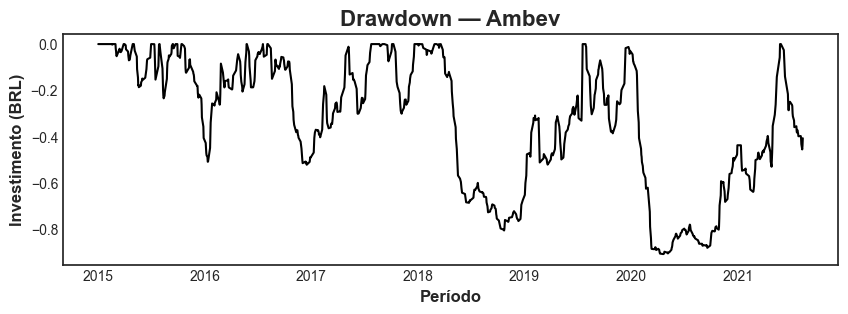

In [ ]:
# Ambev — Plotando o Drawdown

plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots()
fig.set_size_inches([10, 3])

ax.plot(analise(estrat_secreta['Retorno_alvo'])['drawdown'], color = 'black')

ax.set_xlabel('Período', fontweight = 'bold', fontsize = 12)
ax.set_ylabel('Investimento (BRL)', fontweight = 'bold', fontsize = 12)
ax.set_title('Drawdown — Ambev', fontweight = 'bold', fontsize = 16)

plt.show()

Em suma, para desenvolvermos uma estratégia, devemos criar uma regra, que será identificada como um sinal (comprado ou vendido). Para calcular seu retorno histórico, multiplicamos o sinal por o retorno do ativo em questão.  Percorremos esse assunto de forma bem simplificada, há vieses que precisamos nos atentar, sempre temos melhores métodos de se fazer um backtest, podemos utilizar ferramentais estatísticos para comprovar um "alfa", além de que devemos nos atentar que  a execução de uma estratégia talvez não seja viável (produtos disponíveis na corretora, capacidade de executar uma ordem de compra ou venda, liquidez, "caixa disponível", custos de transação , etc.)

In [ ]:
minerva_retorno = minerva.pct_change().iloc[1:]

minerva_retorno

Date
2015-01-05   -0.047469
2015-01-06   -0.014396
2015-01-07    0.066292
2015-01-08   -0.004215
2015-01-09   -0.017989
                ...   
2020-08-24    0.010234
2020-08-25   -0.020984
2020-08-26   -0.000739
2020-08-27   -0.025148
2020-08-28    0.002276
Name: Adj Close, Length: 1408, dtype: float64

In [ ]:
# Minerva — Análise de Risco: Cálculo do Retorno Acumulado

retorno_acumulado_minerva = ((((minerva_retorno + 1).prod() - 1)) * 100)

print(f'O retorno acumulado da Minerva é {round(retorno_acumulado_minerva, 4)}.')

O retorno acumulado da Minerva é 45.6496.


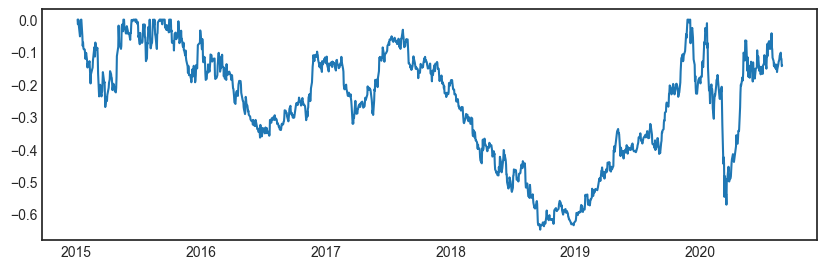

In [ ]:
# Minerva — Plotando o Drawdown

plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots()
fig.set_size_inches([10, 3])

ax.plot(analise(minerva_retorno)['drawdown'])

plt.show()

----

## 9-) Análise e previsão de Séries Temporais

<p align='center'>
"Análise formal de série temporal é maravilhosa quando leva a respostas robustas para questões interessantes. A experiência sugere que dificilmente isso acontece" Robert Solow
</p>

Uma série temporal consiste em observações sequenciais de uma variável (ou conjunto de variáveis) cronologicamente ordenadas e reunidas em intervalos regulares de tempo. Os preços das ativos financeiros (e.g ações) são considerados séries temporais. Nessa etapa você irá lidar com alguns conceitos de econometria e previsão de séries temporais


### Decompondo uma série temporal

Para ter maior entendimento sobre os dados de uma série, podemos separá-la em diferentes componentes . Tendo um maior entendimento, a modelagem pode realizar melhore previsões ao capturar tais peculiaridades. Há dois tipos de componentes:

* sistemáticos:
    * nível
    * tendência 
    * sazonalidade

* não sistemático:
    * erro ou ruído (_noise_)

Há dois tipos de modelos para decompor séries temporais: 

* Modelos aditivos
* Modelos multiplicativos 

Leia o capítulo o Capítulo 3 - _Time Series Modeling_ -  do livro _Python for Finance Cookbook: Over 50 recipes for applying modern Python libraries to financial data analysis_ , do autor Eryk Lewinson


### a-) Decomponha a série de dados das ações do Facebook usando os preços de até  o início 2020 como treino por meio da biblioteca do Prophet (desenvolvida pelo próprio Facebook)

In [ ]:
import pandas as pd
fb = pd.read_csv('dados/Facebook.csv',index_col=0,parse_dates=True)
fb_precos = fb[['adjusted close']].copy()
fb_precos.rename(columns={'adjusted close': "Preços_fechamento"},inplace=True) 

### Estacionaridade 

Em poucas palavras : as propriedades média, variância e estrutura de autocorrelação não mudam no decorrer do tempo.  Encontrar essa propriedade no estudo de séries temporais é "ouro". Caso isso não ocorro, há transformações para "deixá-la estacionária " (diferenciando, por exemplo). 


### b-) Faça um teste estatístico (adfuller) para saber , ele já estara importado para você


In [ ]:
from statsmodels.tsa.stattools import adfuller

### Modelo ARIMA

São uma classe de modelos estatísticos para análise e previsão de séries. Não é o objetivo você saber sobre os detalhes por agora (não teremos exercícios), apenas saiba que ele pode ser usado para a previsão. Caso já tenha tido contato com esses modelos, tende implementar.

- **AR** : Auto Regressive
- **I** : Integrated
- **MA** : Moving Average

----

## 10 -) Machine Learning

Talvez uma das grandes tendências em finanças são as diversas aplicações de aprendizado de máquinas, as quais não se resumem apenas a "previsão" do desempenho dos ativos financeiros , mas também o algo trading, gestão de risco, precificação de derivativos ,a otimização de portfólio, detecção de fraude, análise de sentimento, avaliação de crédito, recomendações de investimentos, etc.  . Devido a seu potencial, vale buscar entender seus conceitos, processos, implantações e ,sobretudo, suas limitações.

Aqui iremos implantar um dos mais antigos modelos , que é a regressão  linear. Por enquanto interprete o modelo como uma caixa preta , em que por meio de atributos (features) podemos "prever" um objetivo  

<img src ='https://www.researchgate.net/profile/Luis-Souto-Maior-Neto/publication/340261225/figure/fig4/AS:874266966884354@1585452896935/Linear-regression-comprises-a-linear-sum-of-input-elements-circles-or-a-weighted-sum.png'>



### a-) Estaremos lidando com as ações do Facebook armazenadas no csv cuja localização é "dados/Facebook.csv" Primeiramente vamos criar os atributos que o modelo usará para fazer a previsão, geralmente os melhores preditores de uma série temporal é o próprio comportamento dela no passado. Eles serão:
* volume do dia
* Retorno dos 15 dias passados
* Preço 5 dias atrás
* preço de 10 dias atrás

### b-) Queremos tentar prever o preço de fechamento do dia seguinte. Faça um lag da série de preços de fechamento. 


obs: lide com os preços de fechamento

In [ ]:
import pandas as pd
fb = pd.read_csv('dados/Google.csv',index_col=0, parse_dates=True)

### c-) Utilize 70% dos dados para treino

### d-) Crie um modelo de Regressão linear simples  e faça a previsão( você mode utilizar tanto o sklearn quanto o statsmodels)

In [ ]:
from sklearn.linear_model import LinearRegression

### e-) Calcule as métricas: 

* r quadrado
* erro médio absoluto
* erro médio quadrado

obs: dê uma olhada em no módulo sklearn.metrics